### Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Loading dataset

In [ ]:
df=pd.read_csv("./LoanExport/LoanExport.csv",low_memory=False)

## Data Pre-Processing & EDA

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### Realizations
1. Average credit score is 709
2. Average MIP is 9
3. Average OCLTV is 77
4. Average DTI is 30
5. Average OrigUPB is 124940
6. Average LTV is 77
7. Average Interest rate is 7%

### Checking Null Values

In [ ]:
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100,"\n\n")

### Numeric and Categoric Columns

In [ ]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

In [ ]:
num

In [ ]:
cat

In [ ]:
# check unique values in categorical cols 
[df[category].value_counts() for category in cat[1:]]

In [ ]:
# check unique values in numerical cols 
[df[numerical].value_counts() for numerical in num[1:]]

#### There are some columns having value 'X' which means there is no information available. So we are changing it with NaN values.

In [ ]:
df['FirstTimeHomebuyer'] = df['FirstTimeHomebuyer'].replace('X', np.nan)
df['MSA'] = df['MSA'].replace('X    ',np.nan)
df['PPM'] = df['PPM'].replace('X', np.nan)
df['PropertyType'] = df['PropertyType'].replace('X ', np.nan)
df['NumBorrowers'] = df['NumBorrowers'].replace('X ', np.nan)

### Checking Nulls after replacing X values

In [ ]:
df.isnull().sum()

#### Handling Missing Values in FirstTimeHomebuyer, PPM and NumBorrowers using mode imputation and dropping MSA and SellerName columns

In [ ]:
# Mode imputation
df['FirstTimeHomebuyer'].fillna(df['FirstTimeHomebuyer'].mode()[0], inplace=True)
df['PPM'].fillna(df['PPM'].mode()[0], inplace=True)
df['NumBorrowers'].fillna(df['NumBorrowers'].mode()[0], inplace=True)
df['PropertyType'].fillna(df['PropertyType'].mode()[0], inplace=True)
df['MSA'].fillna(df['MSA'].mode()[0], inplace=True)
df['SellerName'].fillna(df['SellerName'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

### Converting FirstPaymentDate & MaturityDate into correct date format

In [ ]:
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m')


In [ ]:
df['FirstPaymentDate'].value_counts()

In [ ]:
df['MaturityDate'].value_counts()

#### Creating Pre-Payment Risk(Target) Variable

In [ ]:
df['PrepaymentRisk'] = df['CreditScore'] * df['DTI']

# Scale the prepayment risk values between 0 and 1
scaler = MinMaxScaler()
df['PrepaymentRisk'] = scaler.fit_transform(df[['PrepaymentRisk']])

### Numeric and Categoric Dataframes

In [ ]:
cat = df.select_dtypes('object').columns.to_list()
num = df.select_dtypes('number').columns.to_list()

In [ ]:
#numeric df
BM_num =  df[num]
#categoric df
BM_cat = df[cat]

## Univariant Analysis

### Categoric Columns

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='FirstTimeHomebuyer' , data=df ,palette='mako')
plt.xlabel('FirstTimeHomebuyer', fontsize=14)
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Occupancy' , data=df ,palette='mako')
plt.xlabel('Occupancy', fontsize=14)
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Channel' , data=df ,palette='mako')
plt.xlabel('Channel', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='PPM' , data=df ,palette='mako')
plt.xlabel('PPM', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(27,15))
sns.countplot(x='PropertyState' , data=df ,palette='mako')
plt.xlabel('PropertyState', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='PropertyType' , data=df ,palette='mako')
plt.xlabel('PropertyType', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='LoanPurpose' , data=df ,palette='mako')
plt.xlabel('LoanPurpose', fontsize=14)
plt.show()

#### Categoric columns realizations

* `FirstTimeHomebuyer` - Most of the the borrowers are not first-time homebuyer.
* `Occupancy` - Most of the properties are `owner-occupied`
* `Channel` - Origination channel is mostly `Third-party (T)`. 
* `PPM` - Almost most of the loans borrowed by borrowers have no prepayment penalty. 
* `PropertyState` - Most of the properties are loacted in '`California' (CA)`.
* `PropertyType` - Most of the properties are for `Single-Family (SF)`.
* `LoanPurpose` - The loan purpose for `Purchase(P)` have most values.


In [ ]:
num

### Numeric Columns 

In [ ]:
cols_num=[
'CreditScore',
 'MIP',
 'Units',
 'OCLTV',
 'DTI',
 'OrigUPB',
 'LTV',
 'OrigInterestRate',
 'OrigLoanTerm',
 'EverDelinquent',
 'MonthsDelinquent',
 'MonthsInRepayment',
 'PrepaymentRisk']

In [ ]:
for col in cols_num:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True, bins=50)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f"Distribution of {col}")
    plt.show()

### Realizations
1. Credit score follows a left skewed distribution. Most values are concentrated within 500-800 points
2. Interest Rates are lying between 6-8%
3. OrigUPB values are lying between 100000-300000
4. LTV and OCLTV follows a left skewed distribution. Highest value of both is between 80 to 100

##  Bivariant Analysis of Numerical Columns

In [ ]:
# Create a boxplot to compare the credit scores of first-time homebuyers vs. repeat homebuyers
sns.boxplot(x='FirstTimeHomebuyer', y='CreditScore', data=df)
plt.show()

In [ ]:
# Create a scatter plot to visualize the relationship between debt-to-income ratio and original interest rate
sns.scatterplot(x='DTI', y='OrigInterestRate', data=df)
plt.show()

In [ ]:
# Stacked bar chart of PropertyType vs PrepaymentRisk
pd.crosstab(df['PropertyType'], df['EverDelinquent']).plot(kind='bar', stacked=True)
plt.show()

In [ ]:
sns.histplot(data=df, x='DTI', hue='EverDelinquent', element='step')

In [ ]:
# Plot line graph
df.groupby(['FirstPaymentDate'])['CreditScore'].mean().plot()
plt.xlabel('First Payment Date')
plt.ylabel('Average Credit Score')
plt.show()

In [ ]:
df.groupby(['FirstPaymentDate'])['OrigInterestRate'].mean().plot()
plt.xlabel('First Payment Date')
plt.ylabel('Average OrigInterestRate')
plt.show()

In [ ]:
df.groupby(['FirstPaymentDate'])['DTI'].mean().plot()
plt.xlabel('First Payment Date')
plt.ylabel('Average DTI')
plt.show()

## Multi-Variant Analysis of Numerical Columns

In [ ]:
# Create a pairplot to visualize the relationships between numeric variables
sns.pairplot(df[['CreditScore', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate']])
plt.show()

In [ ]:
num

## Feature Engineering

In [ ]:
df['Location'] = df['PostalCode'].astype(str) + '' + df['PropertyState']

In [ ]:
df.head()

In [ ]:
df = df.drop(['PostalCode','PropertyState'], axis=1)

In [ ]:
# Extract month and year from FirstPaymentDate
df['FirstPaymentMonth'] = df['FirstPaymentDate'].dt.month
df['FirstPaymentYear'] = df['FirstPaymentDate'].dt.year

# Extract month and year from MaturityDate
df['MaturityMonth'] = df['MaturityDate'].dt.month
df['MaturityYear'] = df['MaturityDate'].dt.year


In [ ]:
df = df.drop(['FirstPaymentDate','MaturityDate'], axis=1)

In [ ]:
df.head()

### Finding Outliers 

In [ ]:
# find and print outliers for each numerical column
for col in num:
    q1 = df[col].quantile(0.15)
    q3 = df[col].quantile(0.85)
    iqr = q3 - q1
    lower_bound = q1 - 1 * iqr
    upper_bound = q3 + 1 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col} outliers:")
    print(outliers)

In [ ]:
# calculate median for each column
medians = df[num].median()

### Handling Outliers

In [ ]:
# replace outliers with median
for col in num:
    q1 = df[col].quantile(0.15)
    q3 = df[col].quantile(0.85)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].apply(lambda x: medians[col] if (x < lower_bound or x > upper_bound) else x)


### Numerical column after handling outliers

In [ ]:
# create boxplots for each numerical column after handling outliers
for col in num:
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f"Boxplot of {col}")
    plt.show()

In [ ]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

In [ ]:
Num_Cols=df[num]

In [ ]:
cat_label=[
 'FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PPM',
 'LoanPurpose',
 'NumBorrowers']

In [ ]:
cat_label=df[cat_label]

#### Label Encoding

In [ ]:
cat_label.apply(lambda x: x.nunique()) #checking the number of unique values in each column

In [ ]:
le = LabelEncoder()
Label = [
 'FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PPM',
 'LoanPurpose',
 'NumBorrowers']

for i in Label:
    df[i] = le.fit_transform(df[i])
    
df.tail()

In [ ]:
for variable in ['Location','PropertyType','ServicerName']:
    count_map=df[variable].value_counts().to_dict() ## Calculating the number of observations present in each feature
    df[variable]=df[variable].map(count_map) ## Encoding the variables with the count of their observations

In [ ]:
for var in ['CreditScore','DTI','LTV','OrigUPB','OrigLoanTerm','MonthsInRepayment','PrepaymentRisk']:
    df[var]=df[var].round(3).astype(int) ## rounding off the values to 3 decimal point to simplify the process

In [ ]:
num = df.select_dtypes('number').columns.to_list()

In [ ]:
num

### Dropping irrelevant features

In [ ]:
df.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True) ## Dropping the irrelevant features

In [ ]:
df1=df.copy()

### Correlation

In [ ]:
corr=df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', )
plt.show()

In [ ]:
# Step 2: Correlation analysis
ever_delinquent_corr = corr['EverDelinquent'].abs().sort_values(ascending=False)
# Select variables with correlation above a threshold
significant_corr_vars = ever_delinquent_corr[ever_delinquent_corr > 0.02].index.tolist()

In [ ]:
significant_corr_vars

In [ ]:
df1.head()

In [ ]:
X=df1.drop('EverDelinquent',axis=1) ## independent variables
y=df1['EverDelinquent'] ## dependent variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to
## training
X_train.shape,X_test.shape


In [ ]:
scaler=StandardScaler() ## object for standardscaler
X_train_sc=scaler.fit_transform(X_train) ## fitting the standardscaler object in train set
X_test_sc=scaler.transform(X_test) 

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)

In [ ]:
## fitting our data into the dimensional space 
X_train_trf=pca.fit_transform(X_train_sc)
X_test_trf=pca.transform(X_test_sc)

In [ ]:
pca.explained_variance_

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_ 

In [ ]:
## Finding the optimum number of components
pca=PCA(n_components=None) ## Principal components equal to the number of variables in the data
X_train_trf=pca.fit_transform(X_train_sc)
X_test_trf=pca.transform(X_test_sc)

In [ ]:
X_train_trf

In [ ]:

pca.explained_variance_.shape

In [ ]:
pca.components_.shape 

In [ ]:
pca.explained_variance_ratio_

In [ ]:

np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) ## plotting the cumulative distribution function
plt.xlabel('No of components')
plt.ylabel('% of variance explained')

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Step 1: Instantiate the SelectKBest class with the desired score function
k = 15  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)

# Step 2: Apply SelectKBest to the data
X_new = selector.fit_transform(X, y)

# Step 3: Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Step 4: Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Top 15 features:")
print(selected_features)

In [ ]:
selected_features

### Mutual Information

In [ ]:
# Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
mi_selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
X_mi = mi_selector.fit_transform(X, y)
mi_scores = mi_selector.scores_
mi_features = X.columns[mi_selector.get_support()].tolist()

In [ ]:
mi_features

### Model Building using Top 15 features obtained from PCA

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to

### Gradient Boosting

In [ ]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting model
gb_preds = gb_model.predict(X_test)

# Print classification report and accuracy for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Classification Report:")
print(classification_report(y_test, gb_preds))
print("Accuracy:", accuracy_score(y_test, gb_preds)*100)

In [ ]:
# Print confusion matrix for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_preds))
print()

### XGBoost

In [ ]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(X_test)

# Print classification report and accuracy for XGBoost model
print("XGBoost Classifier:")
print("Classification Report:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds)*100)

In [ ]:
# Print confusion matrix for XGBoost model
print("XGBoost Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print()

### Model Building using Top 15 features obtained from Mutual Information

In [ ]:
X_train_mi,X_test_mi,y_train_mi,y_test_mi=train_test_split(X_mi,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to

### Gradient Boosting

In [ ]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_mi, y_train_mi)

# Make predictions using Gradient Boosting model
gb_preds = gb_model.predict(X_test_mi)

# Print classification report and accuracy for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Classification Report:")
print(classification_report(y_test_mi, gb_preds))
print("Accuracy:", accuracy_score(y_test_mi, gb_preds)*100)

In [ ]:
# Print confusion matrix for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_mi, gb_preds))
print()

### XGBoost

In [ ]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_mi, y_train_mi)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(X_test_mi)

# Print classification report and accuracy for XGBoost model
print("XGBoost Classifier:")
print("Classification Report:")
print(classification_report(y_test_mi, xgb_preds))
print("Accuracy:", accuracy_score(y_test_mi, xgb_preds)*100)

In [ ]:
# Print confusion matrix for XGBoost model
print("XGBoost Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_mi, xgb_preds))
print()

## Prepayment Risk Prediction

In [62]:
data=pd.read_csv("./LoanExport/LoanExport.csv",low_memory=False)

In [63]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [64]:
data['PrepaymentRisk'] = data['CreditScore'] * data['DTI']

# Scale the prepayment risk values between 0 and 1
scaler = MinMaxScaler()
data['PrepaymentRisk'] = scaler.fit_transform(data[['PrepaymentRisk']])

In [65]:
for var in ['MSA','PropertyType','NumBorrowers']: ## Loop containing variables used for handling nan values
    data[var]=data[var].str.strip() ## Removing the white space using str.strip()
    data[var]=data[var].replace('X','Other') ## Replacing nan values with a category "Other"

In [66]:
for var in ['FirstTimeHomebuyer','SellerName']:
    mode=data[var].mode()
    data[var]=data[var].fillna(mode)[0]

In [67]:
data['PPM']=data['PPM'].replace('X','Other') ## Replacing nan values with "Other"
data['PostalCode']=data['PostalCode'].str.strip()
data['PostalCode']=data['PostalCode'].replace('X',np.nan)
data['PostalCode']=data['PostalCode'].fillna(mode)[0]

In [68]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
PrepaymentRisk        0
dtype: int64

In [69]:
# Function for capping outliers with 85th percentile and 15th percentile
def cap_outliers(data,variable):
    
    upper_limit=data[variable].quantile(0.85)
    lower_limit=data[variable].quantile(0.15)
    data[variable]=np.where(data[variable]>=upper_limit,upper_limit,
                         np.where(data[variable]<=lower_limit,lower_limit,
                                 data[variable])) ## We want values larger than upper limit and lower than lower limit

In [70]:
variables=['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigInterestRate','OrigLoanTerm',
          'MonthsDelinquent','MonthsInRepayment']

for variable in variables:
    cap_outliers(data,variable) ## Loop to cap outliers for the variables in the list

In [71]:
## Function to plot distribution after removing outliers
def distribution_plot(data,variable):
    plt.figure(figsize=(8,6))
    
    plt.subplot(1,2,1)
    data.boxplot(column=variable)
    plt.title('Boxplot after handling outliers')
    
    plt.subplot(1,2,2)
    sns.distplot(data[variable])
    plt.title('Distribution after handling outliers')
    
    plt.show()

In [72]:
le = LabelEncoder()
Label = [
 'FirstTimeHomebuyer',
 'Occupancy',
 'Channel',
 'PPM',
 'LoanPurpose',
 'NumBorrowers',
 'PropertyType',
 'PropertyState'
 ]

for i in Label:
    data[i] = le.fit_transform(data[i])
    
data.tail()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,PrepaymentRisk
291446,766.0,199903.0,0,202902.0,37964,0,1,1,62.0,32,...,F199Q1220925,1,360.0,1,FL,Other servicers,0,0.0,27.0,0.508543
291447,766.0,199905.0,0,202904.0,35644,0,1,1,73.0,0,...,F199Q1401332,2,360.0,1,FL,Other servicers,0,0.0,53.0,0.000000
291448,766.0,199905.0,0,202904.0,42044,0,1,1,73.0,31,...,F199Q1401282,1,360.0,0,FL,Other servicers,0,0.0,38.0,0.493238
291449,766.0,199904.0,0,202903.0,37964,0,1,0,80.0,54,...,F199Q1220924,2,360.0,1,FL,Other servicers,0,0.0,32.0,0.864303
291450,766.0,199903.0,0,202902.0,37964,0,1,1,62.0,29,...,F199Q1220923,2,360.0,1,FL,Other servicers,0,0.0,29.0,0.466360


In [73]:
for var in ['ServicerName','MSA']:
    frequency_map=(data[var].value_counts()/len(data)).to_dict() ## Calculating the frequency of the variables and convert them into
    ## a dictionary
    data[var]=data[var].map(frequency_map) ## Encoding with the frequency of the variables through loop

In [74]:
data.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True) ## Dropping the irrelevant features

In [75]:
for var in ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigLoanTerm','MonthsInRepayment']:
    data[var]=data[var].round(1).astype(int) ## rounding off the values to 1 decimal point to simplify the process

In [76]:
data['FirstPaymentDate']=data['FirstPaymentDate'].astype(str) ## converting the feature into string
data['FirstPaymentDate']=pd.to_datetime(data['FirstPaymentDate'],format="%Y%m") ## converting to appropriate date-time format 
## using year and month

data['MaturityDate']=data['MaturityDate'].astype(str)
data['MaturityDate']=pd.to_datetime(data['MaturityDate'],format="%Y%m")

In [77]:
data['FirstPaymentYear']=data['FirstPaymentDate'].dt.year ## extracting year from firstpaymentdate
data['FirstPaymentMonth']=data['FirstPaymentDate'].dt.month ## extracting month from firstpaymentdate
data['MaturityYear']=data['MaturityDate'].dt.year ## extracting year from maturitydate
data['MaturityMonth']=data['MaturityDate'].dt.month ## extracting month from maturitydate

In [78]:
data.drop(['FirstPaymentDate','MaturityDate'],axis=1,inplace=True)

In [79]:
data.head()

,CreditScore,FirstTimeHomebuyer,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,...,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,PrepaymentRisk,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth
0,653,0,0.030094,25,1,1,89,27,117000,89,...,1,0.077632,0,0.0,52,0.0,1999,3,2029,2
1,653,0,0.018991,0,1,1,73,17,109000,73,...,0,0.018525,0,0.0,98,0.0,1999,3,2029,2
2,653,0,0.000261,0,1,1,75,16,88000,75,...,1,0.077632,0,0.0,67,0.0,1999,3,2029,2
3,653,0,0.032040,0,1,1,76,14,160000,76,...,1,0.039664,0,0.0,35,0.0,1999,3,2029,2
4,653,0,0.014253,0,1,1,78,18,109000,78,...,1,0.039664,0,0.0,54,0.0,1999,3,2029,2


In [ ]:
data.to_csv('result.csv')

In [80]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X=data.drop('PrepaymentRisk',axis=1) ## independent variables
y=data['PrepaymentRisk'] ## dependent variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to
## training
X_train.shape,X_test.shape

((233160, 27), (58291, 27))

In [81]:
scaler=StandardScaler() ## object for standardscaler
X_train=scaler.fit_transform(X_train) ## fitting the standardscaler object in train set
X_test=scaler.transform(X_test) ## fitting the scaler object in test set

In [82]:
## Finding the optimum number of components
pca=PCA(n_components=None) ## Principal components equal to the number of variables in the data
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [84]:
np.cumsum(pca.explained_variance_ratio_) ## cumulative percentages of eigenvectors

array([0.148705  , 0.25003347, 0.34498355, 0.41074836, 0.4697496 ,
       0.52560181, 0.57750126, 0.62555898, 0.67069937, 0.71582235,
       0.75780493, 0.79660271, 0.83417531, 0.86923226, 0.90365579,
       0.93600994, 0.96295922, 0.98888335, 0.99962557, 0.99996197,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Text(0, 0.5, '% of variance explained')

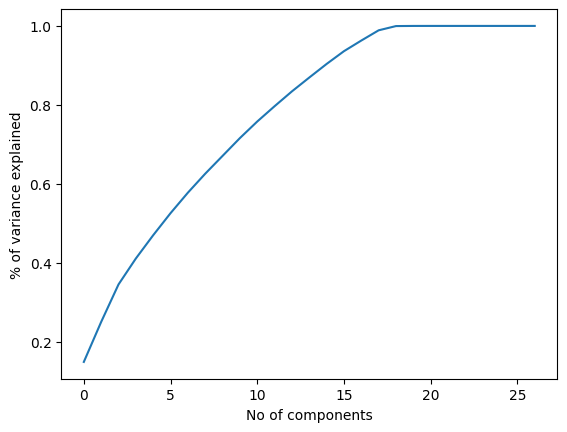

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) ## plotting the cumulative distribution function
plt.xlabel('No of components')
plt.ylabel('% of variance explained')

In [86]:
from sklearn.feature_selection import f_regression ## F-score
ordered_rank_features=SelectKBest(score_func=f_regression,k=15) ## This will give the top 15 features according to their F-score
ordered_feature=ordered_rank_features.fit(X,y) ## Fitting the algorithm to the dataset. Higher the F-score, more relevant
## is the feature with the target

In [87]:
ordered_feature.scores_ ## p-values corresponding to each F-score. Lower the p-value, more relevant the feature is with the
## target

array([1.06180755e+02, 0.00000000e+00, 1.06156709e+01, 1.71281224e+03,
       6.13752796e+01, 6.17158617e-02, 1.84401721e+03, 5.35199140e+06,
       1.35628423e+03, 1.82216821e+03, 1.82490808e+03, 4.75369126e+02,
       1.33040009e+00, 2.69566122e+02, 3.92247242e+01, 0.00000000e+00,
       5.43726685e+02, 0.00000000e+00, 2.11837597e+03, 1.48231442e+00,
       8.28359389e+01, 8.28359389e+01, 8.75126021e-05, 0.00000000e+00,
       2.53221547e+03, 0.00000000e+00, 2.60548224e+03])

In [88]:
datascores=pd.DataFrame(ordered_feature.scores_) ## converting the F-scores numpy array to a dataframe
datacolumns=pd.DataFrame(X.columns) ## Converting the independent features array to a dataframe

In [89]:
features_rank=pd.concat([datacolumns,datascores],axis=1) ## merging the two dataframes
features_rank.columns=['Features','Scores'] ## naming the columns
features_rank

,Features,Scores
0,CreditScore,1.061808e+02
1,FirstTimeHomebuyer,0.000000e+00
2,MSA,1.061567e+01
3,MIP,1.712812e+03
4,Units,6.137528e+01
5,Occupancy,6.171586e-02
6,OCLTV,1.844017e+03
7,DTI,5.351991e+06
8,OrigUPB,1.356284e+03
9,LTV,1.822168e+03


In [90]:
features_rank.nlargest(15,'Scores') ## We need only 15 features to explain the maximum amount of variance in the data

,Features,Scores
7,DTI,5.351991e+06
26,MaturityMonth,2.605482e+03
24,FirstPaymentMonth,2.532215e+03
18,NumBorrowers,2.118376e+03
6,OCLTV,1.844017e+03
10,OrigInterestRate,1.824908e+03
9,LTV,1.822168e+03
3,MIP,1.712812e+03
8,OrigUPB,1.356284e+03
16,LoanPurpose,5.437267e+02


In [91]:
X=data[['DTI','MaturityMonth','FirstPaymentMonth','OCLTV','OrigInterestRate','LTV','MIP','NumBorrowers',
     'OrigUPB','PropertyState','LoanPurpose','Channel','PostalCode','PropertyType','CreditScore']]
y=data['PrepaymentRisk']

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((233160, 15), (58291, 15))

In [93]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Model building using PCA and top features

In [94]:
# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_preds = linear_reg.predict(X_test)

# Evaluate linear regression model
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_reg_r2 = r2_score(y_test, linear_reg_preds)

print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", linear_reg_mse)
print("Mean Absolute Error (MAE):", linear_reg_mae)
print("R-squared (R2):", linear_reg_r2)
print('Training Accuracy:',linear_reg.score(X_train,y_train))
print('Test Accuracy:',np.round(linear_reg.score(X_test,y_test),2))



Linear Regression Metrics:
Mean Squared Error (MSE): 0.0007899848666193402
Mean Absolute Error (MAE): 0.011276290392804054
R-squared (R2): 0.9752451439439389
Training Accuracy: 0.9760582674363629
Test Accuracy: 0.98


In [95]:
filename="Linear_PCA_model.pkl"

In [96]:
import pickle
pickle.dump(linear_reg,open(filename,'wb'))

In [97]:
# Train the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions on the test set
lasso_preds = lasso.predict(X_test)

# Evaluate Lasso model
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print("\nLasso Metrics:")
print("Mean Squared Error (MSE):", lasso_mse)
print("Mean Absolute Error (MAE):", lasso_mae)
print("R-squared (R2):", lasso_r2)
print('Training Accuracy:',lasso.score(X_train,y_train))
print('Test Accuracy:',np.round(lasso.score(X_test,y_test),2))


Lasso Metrics:
Mean Squared Error (MSE): 0.0008607100400194448
Mean Absolute Error (MAE): 0.0131374787983872
R-squared (R2): 0.9730289097335902
Training Accuracy: 0.9738222545085506
Test Accuracy: 0.97


In [98]:
filename="Lasso_PCA_model.pkl"

In [99]:
pickle.dump(linear_reg,open(filename,'wb'))

### Model building using MI and top features

In [100]:
from sklearn.feature_selection import mutual_info_regression
mi_selector = SelectKBest(score_func=mutual_info_regression, k=15)  # Select top 15 features
X_mi = mi_selector.fit_transform(X, y)
mi_scores = mi_selector.scores_
mi_features = X.columns[mi_selector.get_support()].tolist()

In [101]:
mi_features

['DTI',
 'MaturityMonth',
 'FirstPaymentMonth',
 'OCLTV',
 'OrigInterestRate',
 'LTV',
 'MIP',
 'NumBorrowers',
 'OrigUPB',
 'PropertyState',
 'LoanPurpose',
 'Channel',
 'PostalCode',
 'PropertyType',
 'CreditScore']

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.3,random_state=0)

### LinearRegression

In [103]:
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred=lin.predict(X_test)
print('Linear Regression Metrics:')
print('R2 Score:',r2_score(y_pred,y_test))
print('Mean Squared Error:',mean_squared_error(y_pred,y_test))
print('Mean Absolute Error:',mean_absolute_error(y_pred,y_test))

Linear Regression Metrics:
R2 Score: 0.9745750064933433
Mean Squared Error: 0.0007950983304564496
Mean Absolute Error: 0.011270277670742264


In [104]:
print('Training Accuracy:',lin.score(X_train,y_train))
print('Test Accuracy:',np.round(lin.score(X_test,y_test),2))

Training Accuracy: 0.9762100841623681
Test Accuracy: 0.98


In [105]:
filename="Linear_MI_model.pkl"
pickle.dump(lin,open(filename,'wb'))

### LassoRegression

In [106]:
# Train the Lasso model
lasso_mi = Lasso(alpha=0.1)
lasso_mi.fit(X_train, y_train)

# Make predictions on the test set
lasso_preds = lasso_mi.predict(X_test)

# Evaluate Lasso model
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

print("\nLasso Metrics:")
print("Mean Squared Error (MSE):", lasso_mse)
print("Mean Absolute Error (MAE):", lasso_mae)
print("R-squared (R2):", lasso_r2)
print('Training Accuracy:',lasso.score(X_train,y_train))
print('Test Accuracy:',np.round(lasso.score(X_test,y_test),2))


Lasso Metrics:
Mean Squared Error (MSE): 0.0008646822439315137
Mean Absolute Error (MAE): 0.013122159597961534
R-squared (R2): 0.9729866389437463


C:\Users\Abu Huraira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Abu Huraira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Training Accuracy: 0.9739593714021727
Test Accuracy: 0.97


In [107]:
filename="Lasso_MI_model.pkl"
pickle.dump(lasso_mi,open(filename,'wb'))

## Classification

### Model building using PCA and top features

In [108]:
X=data[['DTI','MaturityMonth','FirstPaymentMonth','OCLTV','OrigInterestRate','LTV','MIP','NumBorrowers',
     'OrigUPB','PropertyState','LoanPurpose','Channel','PostalCode','PropertyType','CreditScore']]
y=data['EverDelinquent']

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to

In [110]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting model
gb_preds = gb_model.predict(X_test)

# Print classification report and accuracy for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Classification Report:")
print(classification_report(y_test, gb_preds))
print("Accuracy:", np.round(accuracy_score(y_test, gb_preds)*100,2))

Gradient Boosting Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     46771
           1       0.54      0.03      0.06     11520

    accuracy                           0.80     58291
   macro avg       0.67      0.51      0.48     58291
weighted avg       0.75      0.80      0.73     58291

Accuracy: 80.33


In [111]:
# Print confusion matrix for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_preds))
print()

Gradient Boosting Classifier:
Confusion Matrix:
[[46429   342]
 [11124   396]]



In [112]:
filename="GB_PCA_model.pkl"
pickle.dump(gb_model,open(filename,'wb'))

In [113]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(X_test)

# Print classification report and accuracy for XGBoost model
print("XGBoost Classifier:")
print("Classification Report:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", np.round(accuracy_score(y_test, xgb_preds)*100,2))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:PostalCode: object

In [ ]:
# Print confusion matrix for XGBoost model
print("XGBoost Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_preds))
print()

In [ ]:
filename="XGB_PCA_model.pkl"
pickle.dump(xgb_model,open(filename,'wb'))

### Model Building using Top 15 features obtained from Mutual Information

In [114]:
X_train_mi,X_test_mi,y_train_mi,y_test_mi=train_test_split(X_mi,y,test_size=0.2,random_state=0) ## 20% data is for test and 80% goes to

### Gradient Boosting

In [116]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_mi, y_train_mi)

# Make predictions using Gradient Boosting model
gb_preds = gb_model.predict(X_test_mi)

# Print classification report and accuracy for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Classification Report:")
print(classification_report(y_test_mi, gb_preds))
print("Accuracy:",np.round( accuracy_score(y_test_mi, gb_preds)*100,2))

Gradient Boosting Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     46771
           1       0.54      0.03      0.06     11520

    accuracy                           0.80     58291
   macro avg       0.67      0.51      0.48     58291
weighted avg       0.75      0.80      0.73     58291

Accuracy: 80.33


In [117]:
# Print confusion matrix for Gradient Boosting model
print("Gradient Boosting Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_mi, gb_preds))
print()

Gradient Boosting Classifier:
Confusion Matrix:
[[46428   343]
 [11124   396]]



### XGBoost

In [118]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_mi, y_train_mi)

# Make predictions using XGBoost model
xgb_preds = xgb_model.predict(X_test_mi)

# Print classification report and accuracy for XGBoost model
print("XGBoost Classifier:")
print("Classification Report:")
print(classification_report(y_test_mi, xgb_preds))
print("Accuracy:", np.round(accuracy_score(y_test_mi, xgb_preds)*100,2))

XGBoost Classifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     46771
           1       0.50      0.07      0.12     11520

    accuracy                           0.80     58291
   macro avg       0.66      0.53      0.51     58291
weighted avg       0.75      0.80      0.74     58291

Accuracy: 80.25


In [119]:
# Print confusion matrix for XGBoost model
print("XGBoost Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test_mi, xgb_preds))
print()

XGBoost Classifier:
Confusion Matrix:
[[45955   816]
 [10698   822]]

